### STEPS

- Read the dataset
- EDA, FE
- Divide our dataset into independent and dependent Features
- Further divide the dataset into train and test 
- In Linear Regression we need to do Standard scaling(because there units will vary so scale down to make mean = 0, standard deviation as 1)
- Model Training
- 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv('height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

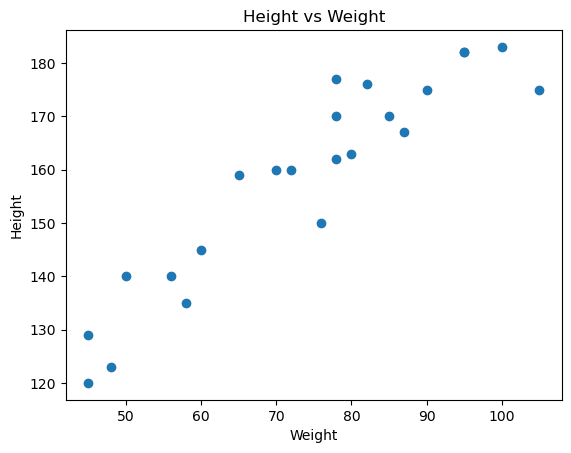

In [7]:
plt.scatter(df.Weight,df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [9]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [10]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [11]:
## Divide our dataset into independent and dependent Features
X = df[['Weight']] #independent feature
y = df['Height'] 

In [12]:
X.shape

(23, 1)

In [13]:
y.shape

(23,)

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state= 42)

In [20]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [21]:
y_train.shape, y_test.shape

((18,), (5,))

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [27]:
X_train_scaler = scaler.fit_transform(X_train)

In [28]:
X_test_scaler = scaler.transform(X_test)

In [29]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

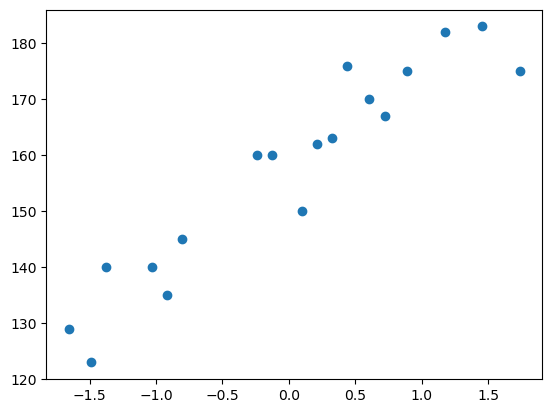

In [31]:
plt.scatter(X_train_scaler,y_train) 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
## Model Training

regressor = LinearRegression()

In [34]:
## Training the train data
regressor.fit(X_train_scaler,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
regressor.coef_  

array([17.03440872])

In [ ]:
regressor.intercept_  

np.float64(157.5)

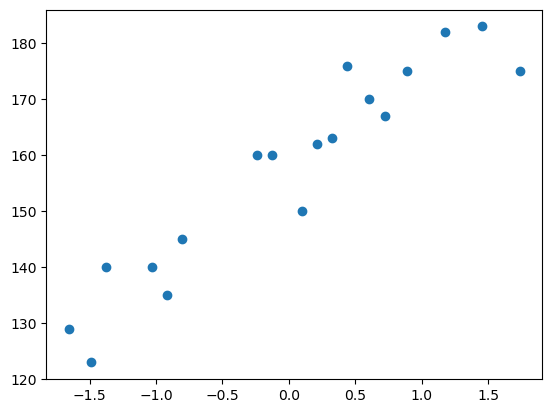

In [37]:
plt.scatter(X_train_scaler, y_train)

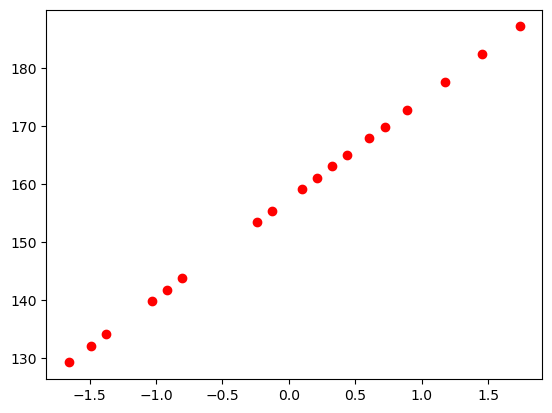

In [38]:
plt.scatter(X_train_scaler, regressor.predict(X_train_scaler), color='red')

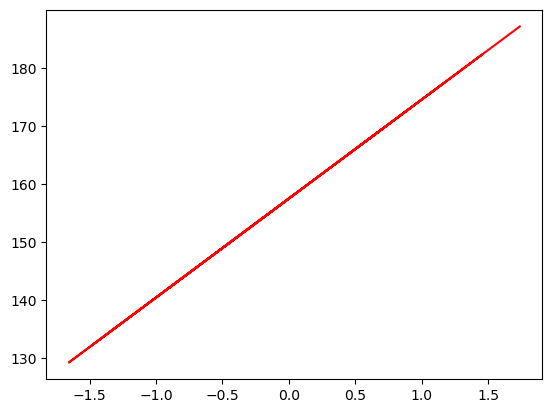

In [39]:
plt.plot(X_train_scaler, regressor.predict(X_train_scaler), color='red')

In [42]:
## predicting on test data
y_pred_test = regressor.predict(X_test_scaler)

In [43]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [44]:
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [45]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mse)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 109.77592599051658
Mean Absolute Error: 9.822657814519232
R^2 Score: 0.776986986042344
Root Mean Squared Error: 10.477400726827078


In [47]:
## Accuracy of the model we use r2 score and adjusted r2 score


from sklearn.metrics import r2_score



In [48]:
score = r2_score(y_test, y_pred_test)

In [49]:
score

0.776986986042344

In [50]:
## Adjusted R2 Score
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252